## E02 : Adversarial Search (Minimax)

In [1]:
import copy
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from classes.Color import Color
from classes.Game import TicTacToe
from IPython.display import display
from matplotlib.figure import Figure
from matplotlib.colors import ListedColormap
from classes.Player import SmartComputerPlayer, HumanPlayer, RandomComputerPlayer

GAME_DIMS = (3,3)

#### **2.01:** Apply Backtracking to Binary Tree

Para el siguiente grafo, utilizando backtracking determine la ruta  
con la cual se alcanza el estado meta representado por el nodo  
$X_{G} = M$, considere que el estado de inicio es $X_{I} = A$  

#### **2.02:** Minimax Tree

Considere un juego que tiene cuatro estados finales y los caminos para alcanzar el estado final van desde la raíz hasta las cuatro hojas de un árbol binario perfecto, como se muestra en la figura.

<img src="imgs/e2.02_tree.jpeg" alt="Árbol de Juego" width=200 height=200>
  
Supongamos que usted es el jugador que maximiza y tiene la primera oportunidad de mover, es decir, esta en la raíz y su oponente en el siguiente nivel.  
  
- ¿Qué movimiento haría como jugador maximizador considerando que su oponente también juega de manera óptima?

**Solution:**  

$max\;(min (3,5),\;min(2,9))$ 

#### **2.03:** Implement Minimax Algorithm

In [ ]:
inputs = [[3,5,2,9],
        [3,5,2,9,12,5,23,23],
        [-1,4,2,6,-3,-5,0,7]]

def pairwise(iterable):
    a = iter(iterable)
    return zip(a, a)

def minmax(terminals:np.ndarray) -> np.int32:
    levels = int(np.log2(len(terminals)))
    if levels == 1: return np.max(terminals)
    elif levels % 2 == 0:
        return minmax(np.array([np.minimum(a,b) for a,b in pairwise(terminals)]))
    else:
        return minmax(np.array([np.maximum(a,b) for a,b in pairwise(terminals)]))

if __name__ == "__main__":
    for i in range(len(inputs)):
        print(f"Test Input #{i}")
        print(f"{minmax(inputs[i])}\n")

#### **2.04:** Implement `initial_state()` functions for Tic-Tac-Toe Board

1) Implementar en Google Colab la función `initial_state()`. La cual  
establece $S_{0}$, el **estado inicial**, que especifica la configuración inicial del  
juego (en nuestro caso, un tablero vacío de ($3 \times 3$). La función debe  
regresar una lista $3 \times 3$ con contenido `'None'` en cada elemento.
  
2) Implementar en Google Colab una función para desplegar la información  
del tablero (estado actual) en forma gráfica utilizando: Matplotlib,  
Pygame, Tkinter, OpenCV, etc.

In [ ]:
board = TicTacToe((3,3))
print(f"{Color.BOLD}TicTacToe State (Array){Color.END}: \n{board.state}")
board.board

In [ ]:
board.make_move(np.array([0,1]))
board.make_move(np.array([1,1]))
display(board.board)

In [ ]:
# Reset board
board.init_state()
display(board.board)

#### **E2.05**: Implement `Player(s)` and `Actions(s)` methods.

1) Implementar en Google Colab la función `Player(s)`.  
La cual regresa a que jugador `(X o O)` le toca mover  
dado el estado $s$.
  
2) Implementar en Google Colab la función `Actions(s)`.  
La cual regresa un conjunto de acciones legales (qué  
lugares están libres) dado un estado $s$.

In [ ]:
b = TicTacToe(GAME_DIMS)
print(f'PLAYER IN TURN: {Color.BOLD}{Color.BLUE if b.player() == "X" else Color.RED} {b.player()}{Color.END}')
print(f"ACTIONS:\n{b.actions()}")
display(b.board)

In [ ]:
# X's Move 1
b.make_move(np.array([2,2]))
print(f'PLAYER IN TURN: {Color.BOLD}{Color.BLUE if b.player() == "X" else Color.RED} {b.player()}{Color.END}')
print(f"ACTIONS:\n{b.actions()}")
display(b.board) 

In [ ]:
# O's Move 1
b.make_move(np.array([1,2]))
print(f'PLAYER IN TURN: {Color.BOLD}{Color.BLUE if b.player() == "X" else Color.RED} {b.player()}{Color.END}')
print(f"ACTIONS:\n{b.actions()}")
display(b.board) 

##### **Reproduce Game with Random Moves**

In [ ]:
def random_game():
    # Create TicTacToe TicTacToe
    b = TicTacToe(GAME_DIMS)
    # Game continues while there are None values on the board
    while (np.any(b.state == None)):
        # Get available actions for player in turn
        U = b.actions()
        player = b.player()
        print(f'PLAYER IN TURN: {Color.BOLD}{Color.BLUE if player == "X" else Color.RED} {player}{Color.END}')
        print(f'ACTIONS FROM TURN {b.ply}:\n{U}')
        
        # Randomly selects one action from action space
        z = U[np.random.choice(U.shape[0], size=1, replace=False), :] 

        # Execute selected move
        b.make_move(z)
        winner = b.winner()
        print(f"MOVE PLAYED: {z.flatten()}")
        print(f"WINNER: {winner} ")
        print(f'IS TERMINAL: {b.is_terminal()}')
        print(f"UTILITY: {b.utility()}")
        display(b.board)
        if winner: return

In [ ]:
random_game()

#### **E2.06:** Implement `Terminal(s)` and `Winner(s)` methods.

1) Implementar en Google Colab la función `Terminal(s)`.  
La cual regresa verdadero (True) cuando el juego  
termina (es decir, verificar si alguien ganó o hay empate)

2) Implementar en Google Colab la función `Winner(s)`.  
La cual regresa el ganado del juego (X o O) o `None` 
en caso de empate.

In [ ]:
b = TicTacToe(GAME_DIMS)
b.make_move(np.array([1,0]))
b.make_move(np.array([0,2]))
b.make_move(np.array([1,1]))
b.make_move(np.array([0,0]))
b.make_move(np.array([2,0]))
b.make_move(np.array([0,1]))
winner = b.winner()
display(b.board)
print(f"WINNER: {winner} ")
print(f'IS TERMINAL: {b.is_terminal()}')
print(f"UTILITY: {b.utility()}")

#### **E2.07:** Implementar `Result(s,a)` y `Utility(s)` methods

1) Implementar en Google Colab la función `Result(s,a)`. La  
cual codifica el **modelo de transición**, función que regresa  
el estado resultante de tomar la acción

2) Implementar en Google Colab la función `Utility(s)`. La  
cual define el valor numérico final para el jugador cuando  
el juego termina en el estado terminal `s`. Devuelve el valor  
de utilidad del estado: -1, 0 o 1.

In [ ]:
bb = TicTacToe(GAME_DIMS)
bb.make_move(np.array([0,2]))
display(bb.board)

In [ ]:
bb.utility()

#### **2.08:** Implement Minimax Algorithm

In [ ]:
def minimax(board, depth):
    if board.is_terminal() or depth == 0:
        return board.utility(), None

    best_value = -math.inf if board.player() == 'X' else math.inf
    best_move = None

    current_state = copy.deepcopy(board.state)
    for move in board.actions():
        board.set_state(current_state)
        board.make_move(move)
        val, _ = minimax(copy.deepcopy(board), depth - 1)
        board.undo_move()

        if board.player() == 'X':
            if val > best_value:
                best_value = val
                best_move = move
        else:
            if val < best_value:
                best_value = val
                best_move = move

    return best_value, best_move

In [ ]:
b = TicTacToe(GAME_DIMS)
b = TicTacToe((3,3))
b.make_move(np.array([2,1]))
b.make_move(np.array([1,1]))
b.make_move(np.array([2,2]))
print(b.state)
print(minimax(copy.deepcopy(b), 5))
b.init_state()

#### **2.09:** Implement Game Mode

In [2]:
def play(game:TicTacToe, x_player, o_player):
    while (np.any(game.state == None) and not game.is_terminal()):
        # Player X move
        if (game.player() == 'X'):
            x_move = x_player.get_move(game)
            game.make_move(x_move)
            game.update_board(x_move)
            display(game.board)
        
        # Player O move
        else:
            o_move = o_player.get_move(game)
            game.make_move(o_move)
            game.update_board(o_move)
            display(game.board)
        print(f"{game.state}\n")
    winner = game.winner()
    if winner == 'X': print(f"PLAYER {x_player.letter} HAS WON!!")
    elif winner == 'O': print(f"PLAYER {o_player.letter} HAS WON!!")
    else: print(f"GAME ENDED IN A DRAW!")
    game.init_state()

BOT played: [2 2]


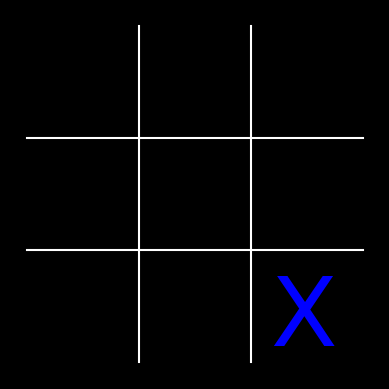

[[None None None]
 [None None None]
 [None None 1]]

BOT played: [0 0]



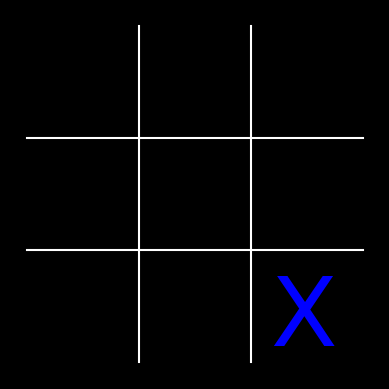

[[0 None None]
 [None None None]
 [None None 1]]

BOT played: [1 2]


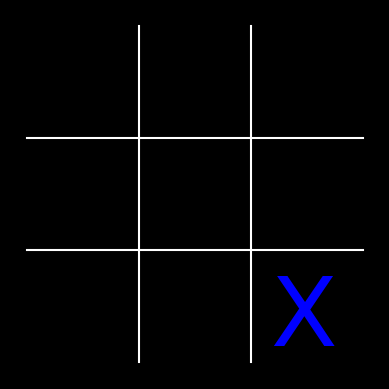

[[0 None None]
 [None None 1]
 [None None 1]]

BOT played: [0 2]



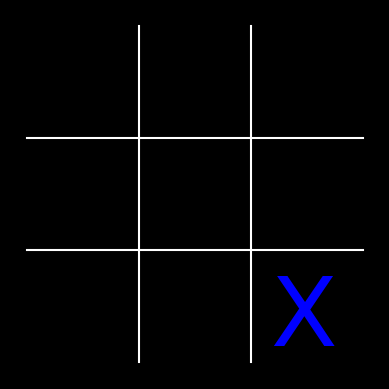

[[0 None 0]
 [None None 1]
 [None None 1]]

BOT played: [0 1]


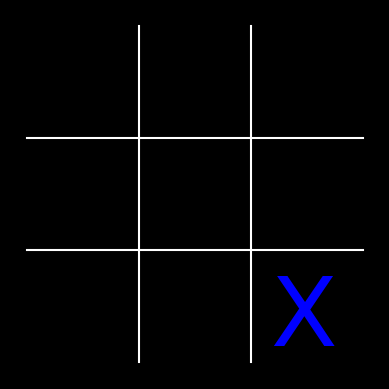

[[0 1 0]
 [None None 1]
 [None None 1]]

BOT played: [2 0]



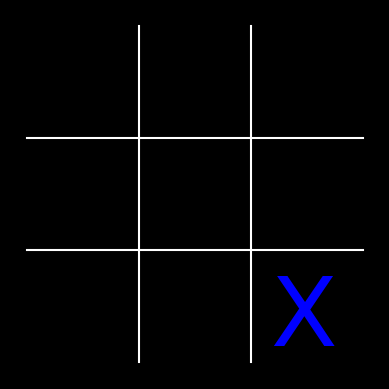

[[0 1 0]
 [None None 1]
 [0 None 1]]

BOT played: [2 1]


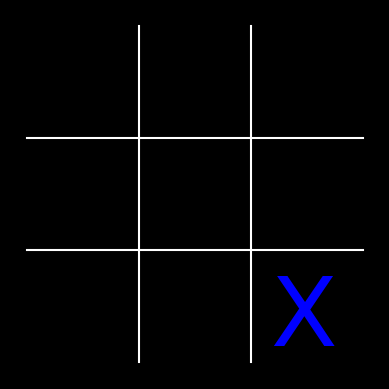

[[0 1 0]
 [None None 1]
 [0 1 1]]

BOT played: [1 0]



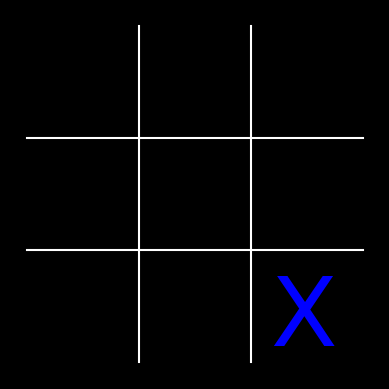

[[0 1 0]
 [0 None 1]
 [0 1 1]]

PLAYER O HAS WON!!


In [4]:
t = TicTacToe(GAME_DIMS)
x_player = RandomComputerPlayer('X')
o_player = SmartComputerPlayer('O')
play(t, x_player, o_player)